# KNN Classification
`01_knn_class.ipynb`


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

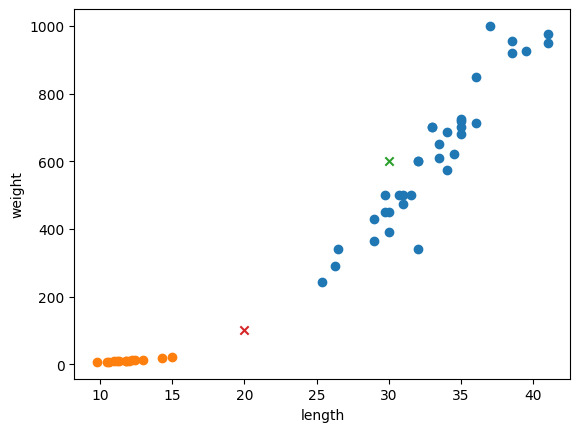

In [58]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter([30], [600], marker='x')
plt.scatter([20], [100], marker='x')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [12]:
bream_df = pd.DataFrame({
    'l': bream_length,
    'w': bream_weight,
    'c': [1] * len(bream_length)
})

smelt_df = pd.DataFrame({
    'l': smelt_length,
    'w': smelt_weight,
    'c': [0] * len(smelt_length)
})

df = pd.concat([bream_df, smelt_df], ignore_index=True)

df.head()

,l,w,c
0,25.4,242.0,1
1,26.3,290.0,1
2,26.5,340.0,1
3,29.0,363.0,1
4,29.0,430.0,1


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
X = df[['l', 'w']]
y = df['c']
# .fit() = 학습
kn.fit(X, y)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [20]:
kn.score(X, y)

1.0

In [23]:
kn.predict([[30, 600], [20, 100]])

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1, 0])

In [ ]:
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(X, y)
kn49.score(X, y)  # 데이터에 도미가 더 많음 -> 뭐가 됐든 다 도미라고 분류


0.7142857142857143

## 지도학습(supervised learning) vs 비지도학습 (unsupervised learning)

지도학습 -> X 입력(input) + y 타겟(target) -> 훈련 데이터

생선데이터
- 입력 -> 길이특성, 무게특성
- 타깃 -> 0, 1
- 입력 + 타깃 = 훈련 데이터

훈련데이터, 테스트데이터

In [ ]:
# 도미만 학습을 시킴
train_X = df[:35][['l', 'w']]
train_y = df[:35]['c']
# 빙어로 테스트
test_X = df[35:][['l', 'w']]
test_y = df[35:]['c']

In [ ]:
kn = KNeighborsClassifier()
kn.fit(train_X, train_y)
kn.score(test_X, test_y)

0.0

In [66]:
# 훈련 셋과 테스트 셋을 잘 나눠야 함..
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)
len(train_X), len(train_y)

(36, 36)

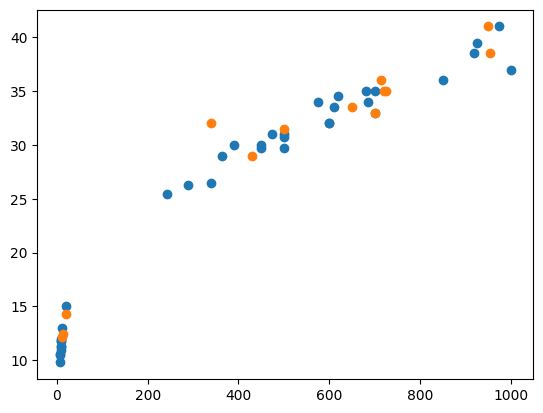

In [67]:
plt.scatter(train_X['w'], train_X['l'])
plt.scatter(test_X['w'], test_X['l'])
plt.show()

In [68]:
kn.fit(train_X, train_y)
kn.score(test_X, test_y)

1.0